# Rollar Coaster Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
df = pd.read_csv('/Users/saquibhazari/Desktop/Python/roller_coaster/CSV/Assets/coaster_db.csv')
df.head(5)

,coaster_name,Length,Speed,Location,Status,Opening date,Type,Manufacturer,Height restriction,Model,...,speed1,speed2,speed1_value,speed1_unit,speed_mph,height_value,height_unit,height_ft,Inversions_clean,Gforce_clean
0,Switchback Railway,600 ft (180 m),6 mph (9.7 km/h),Coney Island,Removed,"June 16, 1884",Wood,LaMarcus Adna Thompson,NaN,Lift Packed,...,6 mph,9.7 km/h,6.0,mph,6.0,50.0,ft,NaN,0,2.9
1,Flip Flap Railway,NaN,NaN,Sea Lion Park,Removed,1895,Wood,Lina Beecher,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,12.0
2,Switchback Railway (Euclid Beach Park),NaN,NaN,"Cleveland, Ohio, United States",Closed,NaN,Other,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
3,Loop the Loop (Coney Island),NaN,NaN,Other,Removed,1901,Steel,Edwin Prescott,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
4,Loop the Loop (Young's Pier),NaN,NaN,Other,Removed,1901,Steel,Edwin Prescott,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN


In [2]:
# EDA
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1087 entries, 0 to 1086
Data columns (total 56 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   coaster_name                   1087 non-null   object 
 1   Length                         953 non-null    object 
 2   Speed                          937 non-null    object 
 3   Location                       1087 non-null   object 
 4   Status                         874 non-null    object 
 5   Opening date                   837 non-null    object 
 6   Type                           1087 non-null   object 
 7   Manufacturer                   1028 non-null   object 
 8   Height restriction             831 non-null    object 
 9   Model                          744 non-null    object 
 10  Height                         965 non-null    object 
 11  Inversions                     932 non-null    float64
 12  Lift/launch system             795 non-null    o

In [3]:
df.describe()

,Inversions,year_introduced,latitude,longitude,speed1_value,speed_mph,height_value,height_ft,Inversions_clean,Gforce_clean
count,932.000000,1087.000000,812.000000,812.000000,937.000000,937.000000,965.000000,171.000000,1087.000000,362.000000
mean,1.547210,1994.986201,38.373484,-41.595373,53.850374,48.617289,89.575171,101.996491,1.326587,3.824006
std,2.114073,23.475248,15.516596,72.285227,23.385518,16.678031,136.246444,67.329092,2.030854,0.989998
min,0.000000,1884.000000,-48.261700,-123.035700,5.000000,5.000000,4.000000,13.100000,0.000000,0.800000
25%,0.000000,1989.000000,35.031050,-84.552200,40.000000,37.300000,44.000000,51.800000,0.000000,3.400000
50%,0.000000,2000.000000,40.289800,-76.653600,50.000000,49.700000,79.000000,91.200000,0.000000,4.000000
75%,3.000000,2010.000000,44.799600,2.778100,63.000000,58.000000,113.000000,131.200000,2.000000,4.500000
max,14.000000,2022.000000,63.230900,153.426500,240.000000,149.100000,3937.000000,377.300000,14.000000,12.000000


In [4]:
df.shape

(1087, 56)

In [5]:
df.columns

Index(['coaster_name', 'Length', 'Speed', 'Location', 'Status', 'Opening date',
       'Type', 'Manufacturer', 'Height restriction', 'Model', 'Height',
       'Inversions', 'Lift/launch system', 'Cost', 'Trains', 'Park section',
       'Duration', 'Capacity', 'G-force', 'Designer', 'Max vertical angle',
       'Drop', 'Soft opening date', 'Fast Lane available', 'Replaced',
       'Track layout', 'Fastrack available', 'Soft opening date.1',
       'Closing date', 'Opened', 'Replaced by', 'Website',
       'Flash Pass Available', 'Must transfer from wheelchair', 'Theme',
       'Single rider line available', 'Restraint Style',
       'Flash Pass available', 'Acceleration', 'Restraints', 'Name',
       'year_introduced', 'latitude', 'longitude', 'Type_Main',
       'opening_date_clean', 'speed1', 'speed2', 'speed1_value', 'speed1_unit',
       'speed_mph', 'height_value', 'height_unit', 'height_ft',
       'Inversions_clean', 'Gforce_clean'],
      dtype='object')

In [6]:
# Taking those columns which is important for our analysis and taking a copy() of the data.
df = df[['coaster_name', 
#     'Length', 'Speed', 
'Location', 'Status', 
# 'Opening date',
      #  'Type', 
      'Manufacturer', 
      # 'Height restriction', 'Model', 'Height',
      #  'Inversions', 'Lift/launch system', 'Cost', 'Trains', 'Park section',
      #  'Duration', 'Capacity', 'G-force', 'Designer', 'Max vertical angle',
      #  'Drop', 'Soft opening date', 'Fast Lane available', 'Replaced',
      #  'Track layout', 'Fastrack available', 'Soft opening date.1',
      #  'Closing date', 'Opened', 'Replaced by', 'Website',
      #  'Flash Pass Available', 'Must transfer from wheelchair', 'Theme',
      #  'Single rider line available', 'Restraint Style',
      #  'Flash Pass available', 'Acceleration', 'Restraints', 'Name',
       'year_introduced', 'latitude', 'longitude', 'Type_Main',
       'opening_date_clean', 
      #  'speed1', 'speed2', 'speed1_value', 'speed1_unit',
       'speed_mph', 
      #  'height_value', 'height_unit', 
      'height_ft',
       'Inversions_clean', 'Gforce_clean']].copy()

In [7]:
df.head(5)

,coaster_name,Location,Status,Manufacturer,year_introduced,latitude,longitude,Type_Main,opening_date_clean,speed_mph,height_ft,Inversions_clean,Gforce_clean
0,Switchback Railway,Coney Island,Removed,LaMarcus Adna Thompson,1884,40.5740,-73.9780,Wood,1884-06-16,6.0,NaN,0,2.9
1,Flip Flap Railway,Sea Lion Park,Removed,Lina Beecher,1895,40.5780,-73.9790,Wood,1895-01-01,NaN,NaN,1,12.0
2,Switchback Railway (Euclid Beach Park),"Cleveland, Ohio, United States",Closed,NaN,1896,41.5800,-81.5700,Other,NaN,NaN,NaN,0,NaN
3,Loop the Loop (Coney Island),Other,Removed,Edwin Prescott,1901,40.5745,-73.9780,Steel,1901-01-01,NaN,NaN,1,NaN
4,Loop the Loop (Young's Pier),Other,Removed,Edwin Prescott,1901,39.3538,-74.4342,Steel,1901-01-01,NaN,NaN,1,NaN


In [8]:
# changing the columns name to lower case
df.columns

Index(['coaster_name', 'Location', 'Status', 'Manufacturer', 'year_introduced',
       'latitude', 'longitude', 'Type_Main', 'opening_date_clean', 'speed_mph',
       'height_ft', 'Inversions_clean', 'Gforce_clean'],
      dtype='object')

In [9]:
df.columns = [col.lower() for col in df.columns]
df.columns

Index(['coaster_name', 'location', 'status', 'manufacturer', 'year_introduced',
       'latitude', 'longitude', 'type_main', 'opening_date_clean', 'speed_mph',
       'height_ft', 'inversions_clean', 'gforce_clean'],
      dtype='object')

In [10]:
# Changing the open_date column to Date time
df['opening_date_clean'] = pd.to_datetime(df['opening_date_clean'])
df.dtypes

coaster_name                  object
location                      object
status                        object
manufacturer                  object
year_introduced                int64
latitude                     float64
longitude                    float64
type_main                     object
opening_date_clean    datetime64[ns]
speed_mph                    float64
height_ft                    float64
inversions_clean               int64
gforce_clean                 float64
dtype: object

In [11]:
df['month'] = df['opening_date_clean'].dt.month
df['year'] = df['opening_date_clean'].dt.year

In [12]:
df.columns

Index(['coaster_name', 'location', 'status', 'manufacturer', 'year_introduced',
       'latitude', 'longitude', 'type_main', 'opening_date_clean', 'speed_mph',
       'height_ft', 'inversions_clean', 'gforce_clean', 'month', 'year'],
      dtype='object')

In [13]:
df.drop('opening_date_clean', axis=1, inplace=True)

In [14]:
df.head()

,coaster_name,location,status,manufacturer,year_introduced,latitude,longitude,type_main,speed_mph,height_ft,inversions_clean,gforce_clean,month,year
0,Switchback Railway,Coney Island,Removed,LaMarcus Adna Thompson,1884,40.5740,-73.9780,Wood,6.0,NaN,0,2.9,6.0,1884.0
1,Flip Flap Railway,Sea Lion Park,Removed,Lina Beecher,1895,40.5780,-73.9790,Wood,NaN,NaN,1,12.0,1.0,1895.0
2,Switchback Railway (Euclid Beach Park),"Cleveland, Ohio, United States",Closed,NaN,1896,41.5800,-81.5700,Other,NaN,NaN,0,NaN,NaN,NaN
3,Loop the Loop (Coney Island),Other,Removed,Edwin Prescott,1901,40.5745,-73.9780,Steel,NaN,NaN,1,NaN,1.0,1901.0
4,Loop the Loop (Young's Pier),Other,Removed,Edwin Prescott,1901,39.3538,-74.4342,Steel,NaN,NaN,1,NaN,1.0,1901.0


In [15]:
df['month'] = df['month'].astype('Int64')
df['year'] = df['year'].astype('Int64')

In [16]:
df.head(5)

,coaster_name,location,status,manufacturer,year_introduced,latitude,longitude,type_main,speed_mph,height_ft,inversions_clean,gforce_clean,month,year
0,Switchback Railway,Coney Island,Removed,LaMarcus Adna Thompson,1884,40.5740,-73.9780,Wood,6.0,NaN,0,2.9,6,1884
1,Flip Flap Railway,Sea Lion Park,Removed,Lina Beecher,1895,40.5780,-73.9790,Wood,NaN,NaN,1,12.0,1,1895
2,Switchback Railway (Euclid Beach Park),"Cleveland, Ohio, United States",Closed,NaN,1896,41.5800,-81.5700,Other,NaN,NaN,0,NaN,<NA>,<NA>
3,Loop the Loop (Coney Island),Other,Removed,Edwin Prescott,1901,40.5745,-73.9780,Steel,NaN,NaN,1,NaN,1,1901
4,Loop the Loop (Young's Pier),Other,Removed,Edwin Prescott,1901,39.3538,-74.4342,Steel,NaN,NaN,1,NaN,1,1901


In [17]:
# checking for duplicates
df.loc[df.duplicated(subset=['coaster_name'])].head(4)

,coaster_name,location,status,manufacturer,year_introduced,latitude,longitude,type_main,speed_mph,height_ft,inversions_clean,gforce_clean,month,year
43,Crystal Beach Cyclone,Crystal Beach Park,Removed,Traver Engineering,1927,42.8617,-79.0598,Wood,60.0,NaN,0,4.0,1,1926
60,Derby Racer,Revere Beach,Removed,Fred W. Pearce,1937,42.4200,-70.9860,Wood,NaN,NaN,0,NaN,1,1911
61,Blue Streak (Conneaut Lake),Conneaut Lake Park,Closed,NaN,1938,41.6349,-80.3180,Wood,50.0,NaN,0,NaN,5,1938
167,Big Thunder Mountain Railroad,Other,NaN,Arrow Development (California and Florida)Dyna...,1980,NaN,NaN,Steel,35.0,NaN,0,NaN,<NA>,<NA>


In [18]:
df.query("coaster_name == 'Crystal Beach Cyclone'")

,coaster_name,location,status,manufacturer,year_introduced,latitude,longitude,type_main,speed_mph,height_ft,inversions_clean,gforce_clean,month,year
39,Crystal Beach Cyclone,Crystal Beach Park,Removed,Traver Engineering,1926,42.8617,-79.0598,Wood,60.0,NaN,0,4.0,1,1926
43,Crystal Beach Cyclone,Crystal Beach Park,Removed,Traver Engineering,1927,42.8617,-79.0598,Wood,60.0,NaN,0,4.0,1,1926


In [19]:
# Removing the duplicates and saving it as new dataset
df = df.loc[~df.duplicated(subset=['coaster_name', 'location'])].reset_index(drop=True).copy()

In [20]:
df.duplicated(subset=['coaster_name'])

0      False
1      False
2      False
3      False
4      False
       ...  
985    False
986    False
987    False
988    False
989    False
Length: 990, dtype: bool

In [21]:
df.shape

(990, 14)

In [22]:
df['year_introduced'].value_counts()

year_introduced
1999    46
2000    45
1998    30
2001    29
2002    28
        ..
1956     1
1959     1
1961     1
1895     1
1884     1
Name: count, Length: 101, dtype: int64

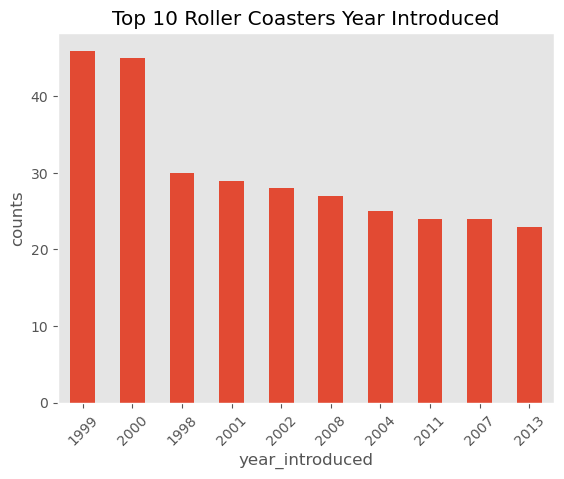

In [23]:
# Visualizing the dataset
df['year_introduced'].value_counts().sort_values(ascending=False).head(10) \
      .plot(kind='bar', ylabel='counts', grid=False)
plt.title('Top 10 Roller Coasters Year Introduced')
plt.xticks(rotation=45)
plt.show()

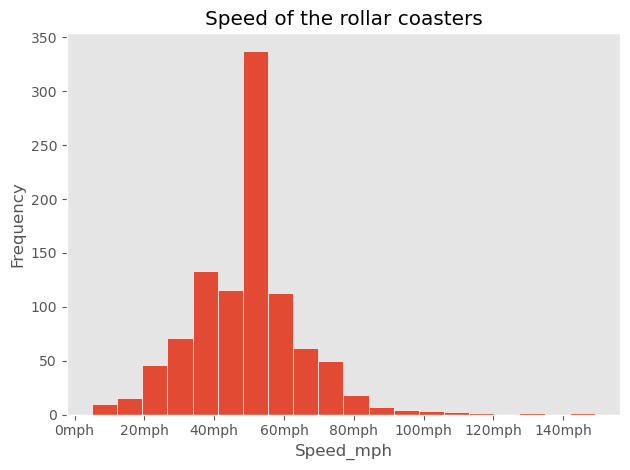

In [81]:
# comparing the seed of the coasters
from matplotlib.ticker import FuncFormatter
df['speed_mph'].plot(kind='hist', bins=20, grid=False, edgecolor='white', xlabel='Speed_mph')
plt.title('Speed of the rollar coasters')
plt.tight_layout()
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f"{int(x/1)}mph"))
plt.show()

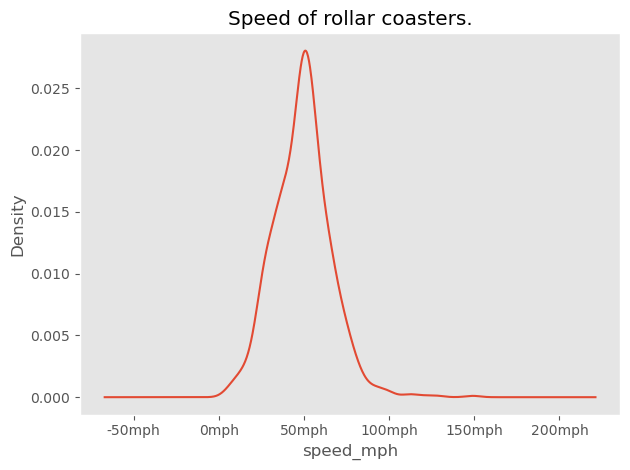

In [25]:
# Making a Kde plot for the speed
df['speed_mph'].plot(kind='kde', grid=False)
plt.title('Speed of rollar coasters.')
plt.xlabel('speed_mph')
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f"{int(x/1)}mph"))
plt.tight_layout()
plt.show()

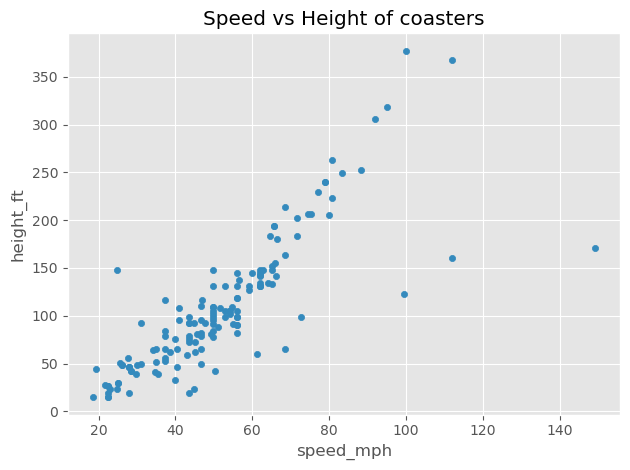

In [26]:
# Making a Scatter plot between speed and height using seaborn and matplotlib
df.plot(x='speed_mph', y='height_ft', kind='scatter', title='Speed vs Height of coasters')
plt.xlabel('speed_mph')
plt.ylabel('height_ft')
plt.tight_layout()
plt.show()

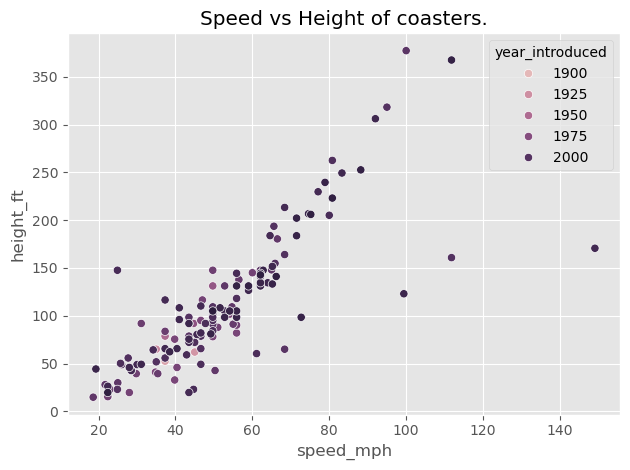

In [27]:
# Making a Scatter plot between speed and height using seaborn and matplotlib
sns.scatterplot(x='speed_mph', y='height_ft',data=df, hue='year_introduced')
plt.title('Speed vs Height of coasters.')
plt.xlabel('speed_mph')
plt.ylabel('height_ft')
plt.tight_layout()
plt.show()

In [28]:
# defining a corr bw the numerical values of the columns
df.columns

Index(['coaster_name', 'location', 'status', 'manufacturer', 'year_introduced',
       'latitude', 'longitude', 'type_main', 'speed_mph', 'height_ft',
       'inversions_clean', 'gforce_clean', 'month', 'year'],
      dtype='object')

In [29]:
df_corr = df.drop(['coaster_name', 'location', 'status', 'manufacturer', 'type_main'],axis=1).corr()

Text(0.5, 1.0, 'Heat map for all the corr.')

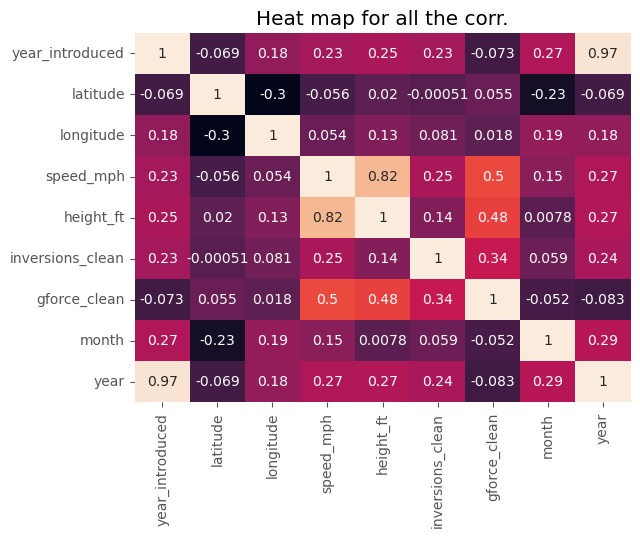

In [30]:
sns.heatmap(data=df_corr, annot=True, cbar=False)
plt.title('Heat map for all the corr.')

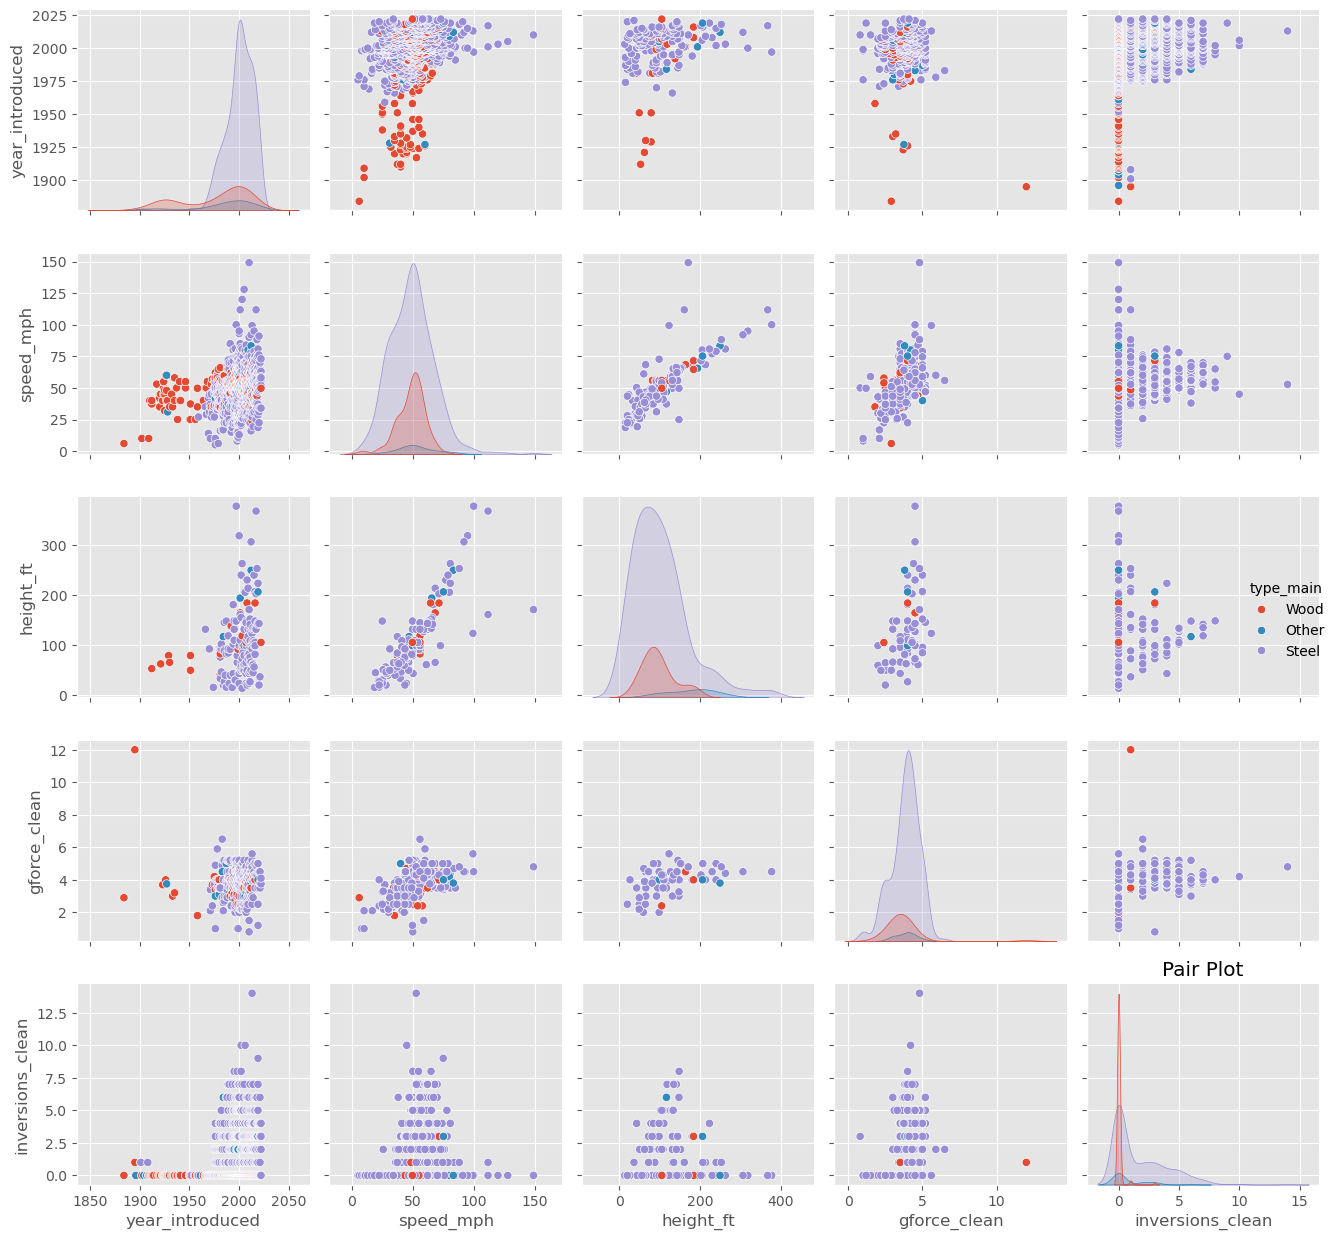

In [31]:
# Making a pair plot for the corr
sns.pairplot(data=df, vars=['year_introduced', 'speed_mph', 'height_ft', 'gforce_clean', 'inversions_clean'], hue='type_main')
plt.title('Pair Plot')
plt.tight_layout()
plt.show()

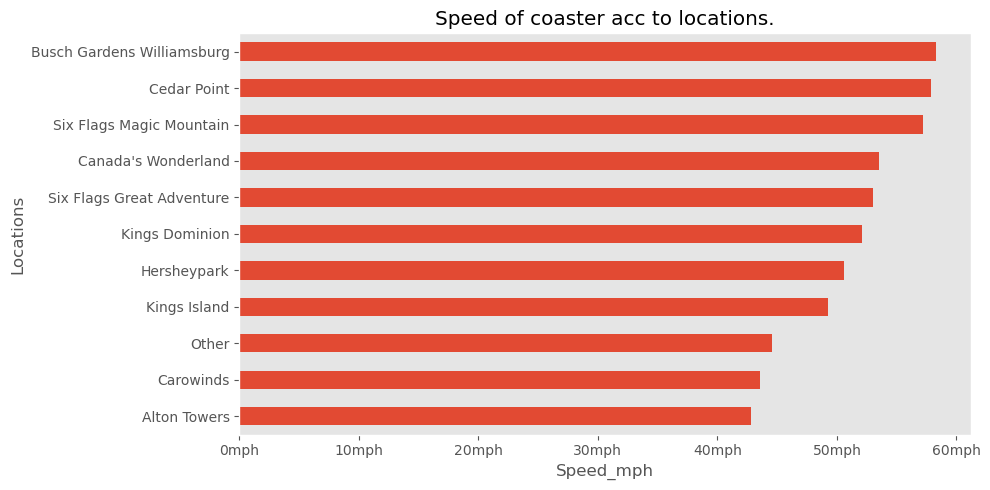

In [32]:
# Finally finding the top most speed rollar coaster acc to the locations.
df.query("location != 'other'").groupby('location')['speed_mph'] \
      .agg(['mean', 'count']).query("count > 10").sort_values('mean')['mean'] \
      .plot(kind='barh', figsize=(10,5), title='Speed of coaster acc to locations.', xlabel='Speed_mph', ylabel='Locations', grid=False)
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f"{int(x/1)}mph"))
plt.tight_layout()
plt.show()

In [33]:
# Training and Testing the model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [34]:
df.isnull().sum()

coaster_name          0
location              0
status              146
manufacturer         58
year_introduced       0
latitude            207
longitude           207
type_main             0
speed_mph           140
height_ft           831
inversions_clean      0
gforce_clean        666
month               183
year                183
dtype: int64

In [35]:
df['speed_mph'] = df['speed_mph'].fillna(df['speed_mph'].mean())
df['height_ft'] = df['height_ft'].fillna(df['height_ft'].mean())

In [36]:
df['gforce_clean'] = df['gforce_clean'].fillna(df['gforce_clean'].mean())

In [37]:
df.drop(['month', 'year'], axis=1, inplace=True)

In [38]:
df.columns

Index(['coaster_name', 'location', 'status', 'manufacturer', 'year_introduced',
       'latitude', 'longitude', 'type_main', 'speed_mph', 'height_ft',
       'inversions_clean', 'gforce_clean'],
      dtype='object')

In [39]:
X = df[['year_introduced', 'inversions_clean', 'gforce_clean', 'type_main']]
y = df['speed_mph']
X = pd.get_dummies(X, columns=['type_main'], drop_first=True)

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [41]:
model = LinearRegression()

In [42]:
model.fit(X_train, y_train)

LinearRegression()

In [43]:
model.coef_

array([ 0.13126138,  1.59959068,  6.07234768, -5.16587553,  0.51015551])

In [44]:
model.intercept_

-234.47773788377282

In [45]:
predictions = model.predict(X_test)

In [83]:
from sklearn import metrics
print('MEA', metrics.mean_absolute_error(y_test, predictions))

MEA 48.27651783101543


In [47]:
# Logistic regresssion
df.columns

Index(['coaster_name', 'location', 'status', 'manufacturer', 'year_introduced',
       'latitude', 'longitude', 'type_main', 'speed_mph', 'height_ft',
       'inversions_clean', 'gforce_clean'],
      dtype='object')

In [48]:
df.head(5)

,coaster_name,location,status,manufacturer,year_introduced,latitude,longitude,type_main,speed_mph,height_ft,inversions_clean,gforce_clean
0,Switchback Railway,Coney Island,Removed,LaMarcus Adna Thompson,1884,40.5740,-73.9780,Wood,6.000000,103.99434,0,2.900000
1,Flip Flap Railway,Sea Lion Park,Removed,Lina Beecher,1895,40.5780,-73.9790,Wood,49.017647,103.99434,1,12.000000
2,Switchback Railway (Euclid Beach Park),"Cleveland, Ohio, United States",Closed,NaN,1896,41.5800,-81.5700,Other,49.017647,103.99434,0,3.815093
3,Loop the Loop (Coney Island),Other,Removed,Edwin Prescott,1901,40.5745,-73.9780,Steel,49.017647,103.99434,1,3.815093
4,Loop the Loop (Young's Pier),Other,Removed,Edwin Prescott,1901,39.3538,-74.4342,Steel,49.017647,103.99434,1,3.815093


In [49]:
df['status'].isnull().sum()

146

In [50]:
df['status'] = df['status'].fillna('Closed')

In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [52]:
df['latitude'] = df['latitude'].fillna(df['latitude'].mean())
df['longitude'] = df['longitude'].fillna(df['longitude'].mean())

In [53]:
X = df.drop(['coaster_name', 'manufacturer', 'location', 'status'], axis=1)
y = df['status'].apply(lambda x: 1 if x == 'Operating' else 0)
X = pd.get_dummies(X, columns=['type_main'], drop_first=True)

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [55]:
lg_model = LogisticRegression()

In [56]:
lg_model.fit(X_train, y_train)

/opt/anaconda3/envs/python_course/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [57]:
lg_model.coef_

array([[ 0.00068637,  0.01875248,  0.0014137 ,  0.01950277, -0.00494535,
         0.06815907, -0.57040632,  0.33956395,  0.24046776]])

In [58]:
pred_lg = lg_model.predict(X_test)

In [59]:
print(classification_report(y_test, pred_lg))
print('\n')
print(confusion_matrix(y_test, pred_lg))

              precision    recall  f1-score   support

           0       0.36      0.06      0.11        63
           1       0.68      0.95      0.80       135

    accuracy                           0.67       198
   macro avg       0.52      0.51      0.45       198
weighted avg       0.58      0.67      0.58       198



[[  4  59]
 [  7 128]]


In [60]:
# Using Randomforest model
from sklearn.ensemble import RandomForestClassifier

In [61]:
df.isnull().sum()

coaster_name         0
location             0
status               0
manufacturer        58
year_introduced      0
latitude             0
longitude            0
type_main            0
speed_mph            0
height_ft            0
inversions_clean     0
gforce_clean         0
dtype: int64

In [62]:
rn_model = RandomForestClassifier(n_estimators=100)
rn_model.fit(X_train, y_train)

RandomForestClassifier()

In [63]:
rn_pred = rn_model.predict(X_test)

In [64]:
print(classification_report(y_test, rn_pred))
print('\n')
print(confusion_matrix(y_test, rn_pred))

              precision    recall  f1-score   support

           0       0.75      0.65      0.69        63
           1       0.85      0.90      0.87       135

    accuracy                           0.82       198
   macro avg       0.80      0.77      0.78       198
weighted avg       0.81      0.82      0.81       198



[[ 41  22]
 [ 14 121]]


In [65]:
# usinf K nerarest classifier for the model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [67]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [68]:
kn_model = KNeighborsClassifier(n_neighbors=5)

In [69]:
kn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [70]:
kn_pred = kn_model.predict(X_test)

In [71]:
print(classification_report(y_test, kn_pred))
print('\n')
print(confusion_matrix(y_test, kn_pred))

              precision    recall  f1-score   support

           0       0.59      0.54      0.56        63
           1       0.79      0.82      0.81       135

    accuracy                           0.73       198
   macro avg       0.69      0.68      0.68       198
weighted avg       0.73      0.73      0.73       198



[[ 34  29]
 [ 24 111]]


# Thank you!

### Random forest model gives the best Prediction than K neighbours and logistic regression.